Neuromorphic engineering I

## Lab 1: Automated Data Acquisition and Analysis
1. **`git pull` the exercises** before starting this notebook! Make sure you are really starting with the authoritative version of the exercise. See [pull changes in the README](./readme.md#clone-the-exercises).
2. **Make a copy of the exercise to work on.** Name it _Lab1_<yourname>_<yourgroupnumber>.ipynb_.  Make sure you put the copy in the same folder (CoACH-labs). It will not work in a different folder because it will not be able in import the *Coach* class.

CoACH chip number:

Team member 1:

Team member 2:

Date:

Group number (if you have been given one by your TA):

-------------------------------------------------------------------------------------------------------------------

**If you only have USB-C output, bring also a USB-C to USB-A adaptor.** We only have a few USB-A-micro cables.

The objectives of this lab are as follows:

- To become acquainted with the experimental board setup.

- To become acquainted with Python for data acquisition and manipulation.

- To measure and characterize a NFET.

The aim of this first lab is to familiarize everyone with the lab equipment and software.

# 1. Getting started

## 1.1 Class chip documentation

You can find the documentation for the classchip here in this [classchip documentation google drive folder](https://drive.google.com/drive/u/0/folders/1VBPKVfS9zwu_I2ExR1D0jU2eCSgleoQG). See also the [notes about the Coach chip](./readme.md#coach-chip) in the README.

## 1.2 Python

If you are new to Python, you can find a detailed tutorial at the link: https://docs.python.org/3/tutorial/ . 

In particular the concepts in _3. An Informal Introduction to Python_ and in _4. More Control FLow Tools_ will be useful for the exercises you will have to solve. 

## 1.3 Report

Upload your notebook (notebook prelab + notebook work + notebook postlab) in HTML or PDF format as an individual to the course dropbox. Make sure that the markdowns are ran and the generated figures are shown.

The deadline is the beginning of the next lab.

There is no prelab for this week, but from the next week on you should complete the prelab before you come to the exercise.

# 2. Exercise setup
See the CoACH-labs [README](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md) for detailed instructions on setting up your computer to do the exercises.

* You may want to install all the necessary requirements (python libraries)

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement pyplane (from versions: none)
ERROR: No matching distribution found for pyplane


If you installed new libraries, you probably have to restart the notebook kernel


* <font color=#108ee9>Run the block below to import libraries and setup a _datapath_ variable for saving your data later.</font>

In [6]:
import time # for time.sleep(seconds)
import numpy as np # numpy for arrays etc
from scipy import stats # for stats.linregress
import matplotlib.pyplot as plt # for plotting
import matplotlib
plt.rcParams.update({'font.size': 14}) # make the detault font size larger for your readers
matplotlib.rcParams['pdf.fonttype'] = 42 # save fonts as type that are not outlined in illustrator or other drawing programs
from engineering_notation import EngNumber as ef # format numbers in engineering format quickly, e.g. ef(2e-9)='2n'
from pathlib import Path # used for saving data

datapath = Path('data/lab1') # make a data folder to save your data called data/lab1
datapath.mkdir(parents=True, exist_ok=True)
from jupyter_save_load_vars import savevars, loadvars

from ne1 import Coach # import Coach() class
p=Coach() # create a Coach object called p; you will use it to talk to class chip

### 2.1.1 Saving and loading data
Use the blocks below to save and load your data

In [122]:
loadvars(datapath/'lab1') # tries to load data from the file data/lab1/lab1.dill. (In the preamble we defined datapath as the Path data/lab1)
#savevars(datapath/'lab1') # use can use this later to save your data

[INFO]: 2025-09-23 15:34:24,824 - saveloadvars - cancelled  loadvars from possibly unsafe dill (File "/Users/mariusfauteux/Documents/CoACH-labs/.conda/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 273, in loadvars)


## 2.2  Making plots

* <font color=#108ee9>Plot a Sine curve from 0 to 2pi  with 200 points.</font> (Hint: Do not forget to properly label the axis and add figure legends when necessary.)

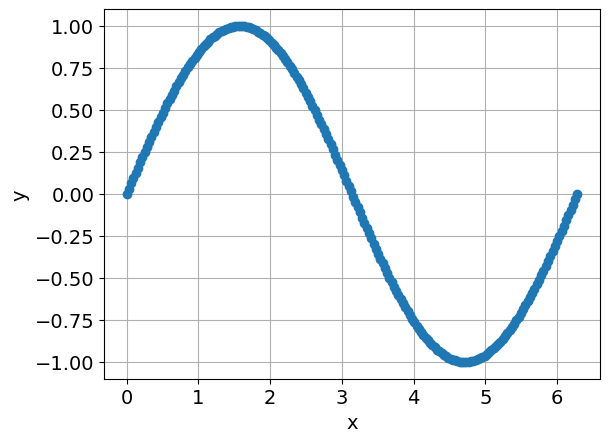

In [120]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 200) # make 200 evenly spaced points from 0 to 2pi
y = np.sin(x)  # take the sin of the values
y2=np.cos(x)
plt.plot(x, y, '-o') # plot the points with o symbol and connecting line
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

* <font color=#108ee9>Add a plot of a Cosine</font> (Use the same range to the Sine plot, but set a different point marker and color.)

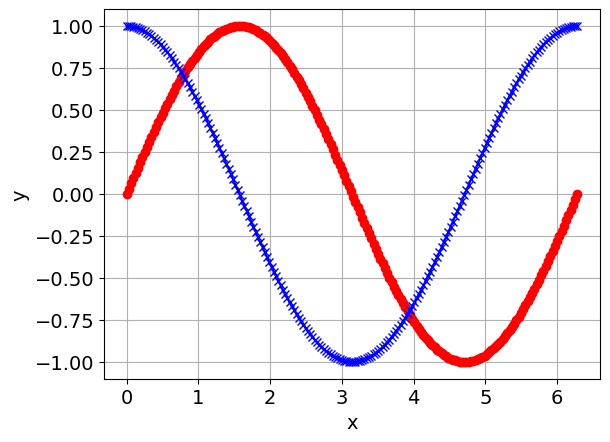

In [121]:
plt.plot(x, y, 'r-o') # plot the points with o symbol and connecting line
plt.xlabel('x')
plt.ylabel('y')
y2=np.cos(x)
plt.plot(x,y2,'b-x')
plt.grid()
plt.show()

* <font color=#108ee9>Make a plot of the equation $ I_{ds} = I_0 e^{\frac{\kappa}{U_T} V_g}$ using the following parameters. Generate two plots, one with linear scaling and one with log scaling on the y axis. Put the right labels on both x axis and y axis.</font> (Hint: use `plt.semilogy`)

In [ ]:
Vg = np.arange(0, 1, 0.001)
I0 = 1e-13
k = 0.6
UT = 25e-3

In [ ]:
Ids = ...

* See the section 2.1.1 about saving and loading data 

## 2.4 Fitting data with a line

Sometimes you may need to find the relationship between data using regression. 
* <font color=#108ee9>Try to extract the slope and intercept of the following given data using linear regression with `np.polyfit`</font>

In [ ]:
x = np.array([1, 3, 5, 7])
y = np.array([ 6, 3, 9, 5 ])
m, b = ...
# compare the orignial data points and the fitted line

-------------------------------------------------------------------------------------------------------------------

# 3 Experiments

From now on you will be using the real board!

Verify that the LEDs of your board are on as in photos shown in the Coach-labs README.

In [12]:
# try to open the CoACH board
p.open()

[INFO]: 2025-09-23 14:31:26,580 - NE1 - Opened CoACH at /dev/cu.usbmodem76183401 with firmware version (1, 12, 5) (File "/Users/mariusfauteux/CoACH-labs/ne1.py", line 175, in open)


You should have see the current firmware version printed above, e.g. (1,12,4) which means firmware version 1.12.4. If your firmware is newer that is fine.

Make sure all these steps are executed correctly.

If the above step fails, check the [Coach Chip troubleshooting hints](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#troubleshooting-your-coach-chip-setup).

In [13]:
# if anything goes wrong, come back here and reset the chip
p.reset_soft()

## 3.3 Basic function operation

You can set and read voltage using function p.set_voltage and p.read_voltage.

Very importantly, all voltage you set on this board must be between 0 and 1.8 V!

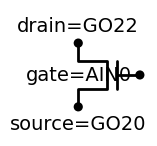

In [14]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet).reverse()
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

The above schematic shows you the names of the mux pins you need to use to measure the FET.

For example: Read the current of the drain of the transistor. This current is read on mux channel GO22. 
Note this is G-Oh, not G-Zero. The O (Oh) character is wider than the 0 (zero).

In [75]:
for i in range(10):
    I_d = p.measure_nfet_id()
    print(f'The measured drain current is {I_d:.3g} A') # note how the formatting is scientific with 3 digits of precision
    time.sleep(0.1)

The measured drain current is 5.42e-06 A
The measured drain current is 4.42e-06 A
The measured drain current is 4.1e-06 A
The measured drain current is 3.91e-06 A
The measured drain current is 5.03e-06 A
The measured drain current is 3.37e-06 A
The measured drain current is 3.83e-06 A
The measured drain current is 3.15e-06 A
The measured drain current is 3.32e-06 A
The measured drain current is 3.54e-06 A


Do you think this current is reasonable? Why not? (Hint: you have not setup the multiplexors yet to connect the on-chip FET to the chip pins)

* <font color=#108ee9>Read the sections</font> about [how FET currents are measured](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#how-fet-currents-are-measured) and [how chip pin voltages are set](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#how-voltages-are-supplied-to-coach-by-the-dacs) in the CoACH-labs README.  

In [16]:
p.setup_nfet()

**Make sure the chip receives the event by a blink of LED1 (the red PCB LED closest to the Teensy), if it's not the case, the chip is dead.**

* <font color=#108ee9>Now set source GO20 FET gate voltage</font> using the function introduced above:

In [71]:
vs_actual=p.set_nfet_vs(.62)
print(vs_actual)

0.6193549036979675


* <font color=#108ee9>Set drain (GO22) voltage</font> to e.g. 1V and the source voltage (GO20) to 0V

In [74]:
p.set_nfet_vd(1)
p.set_nfet_vs(0)

0.0

Try first by setting gate voltage to zero (you can try different voltage between 0~1.8V to see different output current).

* F<font color=#108ee9>ind the gate voltage V_g that first starts to make the current increase.</font> Note how big the offset current is; even at V_g=0 the current is tens of 10nA.

With V_g=0.500, the measured drain current is 3.81e-06 A


Text(0.5, 1.0, 'Drain current vs gate voltage')

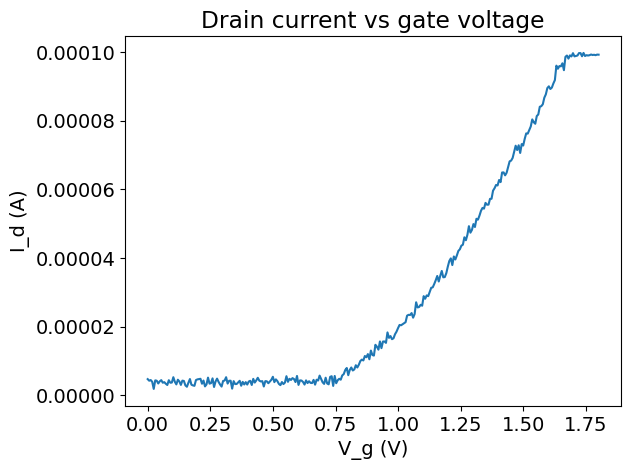

In [91]:
V_g=.5
p.set_nfet_vg(V_g)
I_d = p.measure_nfet_id()
print(f'With V_g={V_g:.3f}, the measured drain current is {I_d:.3g} A') # note how the formatting is scientific with 3 digits of precision

# plot the current vs the gate voltage as V_g increases
V_g_values = np.linspace(0, 1.8, 300)
current_values = []

for V_g in V_g_values:
    p.set_nfet_vg(V_g)
    I_d = p.measure_nfet_id()
    current_values.append(I_d)

# plot the current vs the gate voltage
plt.plot(V_g_values, current_values, '-')
plt.xlabel('V_g (V)')
plt.ylabel('I_d (A)')
plt.title('Drain current vs gate voltage')

* <font color=#108ee9>Set $V_g=0$ to measure the (big) offset current Idoffset</font>

In [92]:
p.set_nfet_vg(0)
Id0 = p.measure_nfet_id()
print(f'With Vg=0, the offset current Id0={Id0:.3g} A')

With Vg=0, the offset current Id0=1.44e-06 A


Now you can try some challenging experiments!

* <font color=#108ee9>Sweep gate voltage between 0~1V and see how the output current changes.</font>

In [109]:
# make a V_g array for the gate voltages ranging e.g. from 0.4V to 0.8V.
# you can adjust this range to cover the realistic measurement range.
import numpy as np
n_samples=30
vg_low=0
vg_high=1.8
Vg_set=np.linspace(vg_low,vg_high,n_samples) # make linear spacing with 100 points
Vg_actual=np.zeros_like(Vg_set) #we will use this to hold the actual DAC values
#Initialize current variables
Id_meas=np.zeros(n_samples)
import time
#Read Ids at Vg sweep and wait for it to settle
for n in range(n_samples):
    Vg_actual[n]=p.set_nfet_vg(Vg_set[n])
    time.sleep(0.05) # sleep a bit to let current settle
    Id_meas[n]=p.measure_nfet_id()
    if n%5==0: print(f'Vg={Vg_actual[n]:8.3f}V Id_meas={Id_meas[n]:.3g}A') # print only every 5th measurement

Vg=   0.000V Id_meas=4.93e-06A
Vg=   0.310V Id_meas=3.42e-06A
Vg=   0.619V Id_meas=3.15e-06A
Vg=   0.931V Id_meas=1.52e-05A
Vg=   1.240V Id_meas=4.24e-05A
Vg=   1.550V Id_meas=8.23e-05A


* <font color=#108ee9>Now plot your data in linear (plt.plot) and log (plt.semilogy) scales:</font>

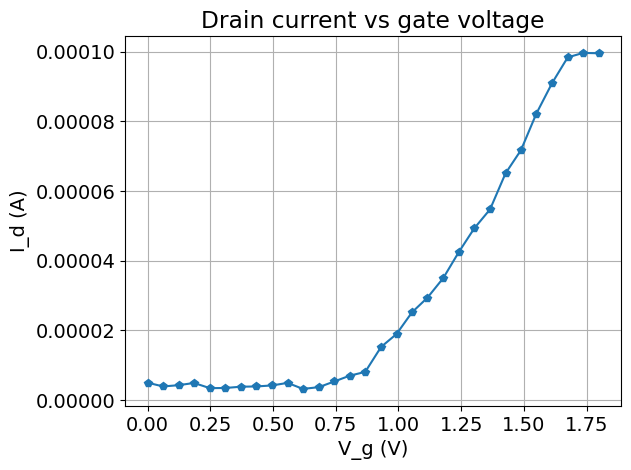

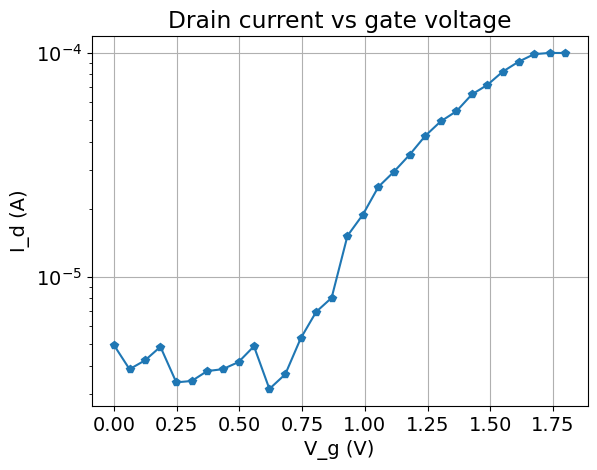

In [110]:
import matplotlib.pyplot as plt
#Plot in linear scale
plt.plot(Vg_actual, Id_meas,'-p')  #plot using line with points marked
plt.xlabel('V_g (V)')
plt.ylabel('I_d (A)')
plt.title('Drain current vs gate voltage')
plt.grid(True) # turn on grid
plt.show() # render the plot

plt.semilogy(Vg_actual, Id_meas,'-p')  #plot using line with points marked
plt.xlabel('V_g (V)')
plt.ylabel('I_d (A)')
plt.title('Drain current vs gate voltage')
plt.grid(True) # turn on grid
plt.show() # render the plot




* <font color=#108ee9>Inspect the plot above.</font> You should see something almost like a step function. Check the range over which you think the measurements are valid and change the limits of the measurement to cover just this range with a fine sweep of Vg. <font color=#108ee9>Plot your new data below.</font>


Vg=   0.799V Id_meas=5.47e-06A
Vg=   0.839V Id_meas=9.4e-06A
Vg=   0.880V Id_meas=1.25e-05A
Vg=   0.920V Id_meas=1.37e-05A
Vg=   0.961V Id_meas=1.7e-05A
Vg=   1.001V Id_meas=1.96e-05A
Vg=   1.042V Id_meas=2.23e-05A
Vg=   1.082V Id_meas=2.7e-05A
Vg=   1.123V Id_meas=3.14e-05A
Vg=   1.163V Id_meas=3.27e-05A
Vg=   1.204V Id_meas=3.89e-05A
Vg=   1.244V Id_meas=4.27e-05A
Vg=   1.284V Id_meas=4.7e-05A
Vg=   1.325V Id_meas=5.19e-05A
Vg=   1.365V Id_meas=5.55e-05A
Vg=   1.406V Id_meas=6.19e-05A
Vg=   1.446V Id_meas=6.84e-05A
Vg=   1.487V Id_meas=7.35e-05A
Vg=   1.526V Id_meas=7.81e-05A
Vg=   1.566V Id_meas=8.51e-05A


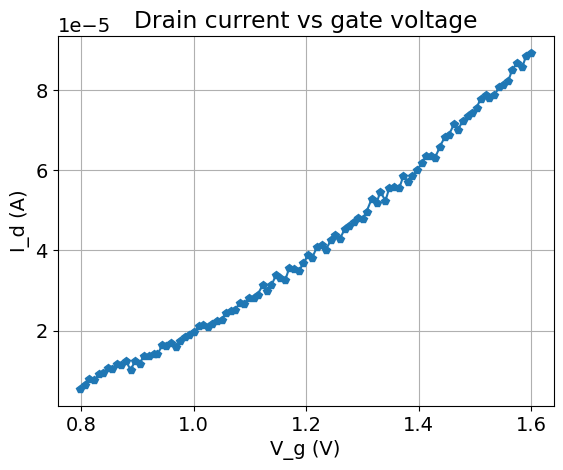

In [112]:
# make a V_g array for the gate voltages ranging e.g. from 0.4V to 0.8V.
# you can adjust this range to cover the realistic measurement range.
n_samples=100
vg_low=.8  # TODO CHANGE HERE and next line to grab just the range you want
vg_high=1.6
Vg_set=np.linspace(vg_low,vg_high,n_samples) # make linear spacing with 100 points
Vg_actual=np.zeros_like(Vg_set) #we will use this to hold the actual DAC values
#Initialize current variables
Id_meas=np.zeros(n_samples)
import time
#Read Ids at Vg sweep and wait for it to settle
for n in range(n_samples):
    Vg_actual[n]=p.set_nfet_vg(Vg_set[n])
    time.sleep(0.05)
    Id_meas[n]=p.measure_nfet_id()
    if n%5==0:
        print(f'Vg={Vg_actual[n]:8.3f}V Id_meas={Id_meas[n]:.3g}A')

Id_corrected=Id_meas # -Id0 # if you want compute the actual current with offset subtracted

#Plot in linear scale
plt.plot(Vg_actual, Id_corrected,'-p')  #plot using line with points marked
plt.xlabel('V_g (V)')
plt.ylabel('I_d (A)')
plt.title('Drain current vs gate voltage')
plt.grid(True) # turn on grid
plt.show() # render the plot

Since the transistor drain current should be exponential in gate voltage in weak inversion/subtthreshold, <font color=#108ee9>replot your current on log scale using `np.semilogy`:</font>

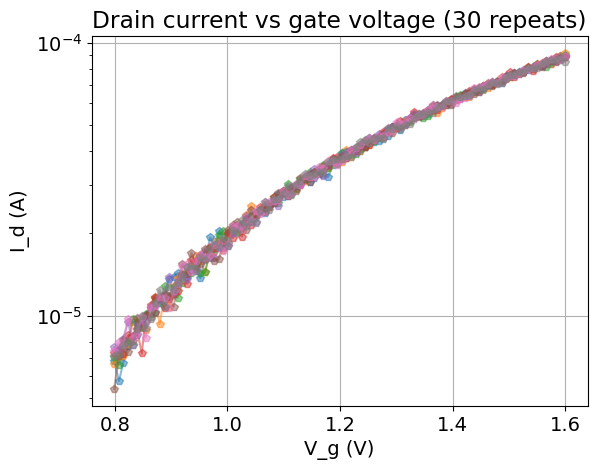

In [117]:
plt.figure()
for i in range(8):
    # Read Ids at Vg sweep and wait for it to settle
    for n in range(n_samples):
        Vg_actual[n] = p.set_nfet_vg(Vg_set[n])
        time.sleep(0.05)
        Id_meas[n] = p.measure_nfet_id()

    Id_corrected = Id_meas # -Id0 # if you want compute the actual current with offset subtracted
    plt.semilogy(Vg_actual, Id_corrected, '-p', alpha=0.5)

plt.xlabel('V_g (V)')
plt.ylabel('I_d (A)')
plt.title('Drain current vs gate voltage (30 repeats)')
plt.grid(True)
plt.show()

<font color=#108ee9>If you have time, you can check the precision of the measurements (repeatability) by capturing the drain current curves e.g. 30 times and plotting these curves all together on one plot.</font> 


# 4.0 Save your precious data so you can replot it later

In [118]:
savevars(datapath/'lab1') # to save variables
# loadvars(datapath/'lab1') # to load variables

[INFO]: 2025-09-23 15:06:49,105 - saveloadvars - Saved to data/lab1/lab1.dill variables [ datapath x y y2 I_d i vs_actual V_g V_g_values current_values Id0 n_samples vg_low vg_high Vg_set Vg_actual Id_meas n Id_corrected ] (File "/Users/mariusfauteux/Documents/CoACH-labs/.conda/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 219, in savevars)
[WARNING]: 2025-09-23 15:06:49,106 - saveloadvars - could not pickle: ['p', 'd', 'Q'] (File "/Users/mariusfauteux/Documents/CoACH-labs/.conda/lib/python3.9/site-packages/jupyter_save_load_vars.py", line 221, in savevars)


# 4. Clean up

Well done! That's all the work with the CoACH chip for today.

Remember you have to clean up in the end just as in a real lab!

* Close you device and release memory by doing

In [119]:
p.close()

[INFO]: 2025-09-23 15:11:16,736 - NE1 - closing device (deleting pyplane.Plane() object (File "/Users/mariusfauteux/CoACH-labs/ne1.py", line 250, in close)


* Save your changes
* Download the files you need for the report to your own PC

# 5. Postlab Questions

1. <font color=#108ee9>Why is there no pin for the bulk of NFET? What is its voltage then?</font>

2. <font color=#108ee9>How precise are the measurements of voltage and current using DAC? </font>
   
Try to be quantitative. Look at the README [How currents are measured](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#how-fet-currents-are-measured) and [How voltages are supplied](https://code.ini.uzh.ch/CoACH/CoACH-labs/-/blob/master/readme.md#how-voltages-are-supplied-to-coach-by-the-dacs).

3. <font color=#108ee9>Do you think building a "computer" whose inputs and outputs are analog voltage/current signals is a good idea? Why or why not?</font>

It depends on the usecase of this "computer, but in eneral I would say no, for the following reasons: 


## 6. Upload your report (this notebook)
Upload your report to the course dropbox as either HTML or PDF (not pynb, which is hard for us to assess). You can export your notebook as HTML, e.g. in [vscode this way](https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook). 


# 10 What we expect you to learn
Please see the [NE1 exam preparation guide](https://drive.google.com/file/d/1nOq3UbcEv_ik425VBYqcH9hAET7FyIeP/view?usp=drive_link)